<a href="https://colab.research.google.com/github/thomson887/Fraudulent_Loan_Application_Project/blob/main/Fraudulent_Loan_Application_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

#setting random seed for reproducing results
np.random.seed(101)

num_rows = 100000


#Generating a synthetic dataset for fradulent loan application.
data = {
    'loan_id': np.arange(1,num_rows+1),
    'applicant_age': np.random.randint(18,70, num_rows),
    'applicant_income': np.random.randint(20000, 200000, num_rows),
    'loan_amount': np.random.randint(1000, 500000, num_rows),
    'loan_term': np.random.randint(6,360, num_rows),
    'credit_score': np.random.randint(300, 850, num_rows),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], num_rows),
    'previous_defaults': np.random.randint(0,5,num_rows),
    'bankruptcy_history': np.random.choice([0,1], num_rows, p=[0.9,0.1]), # Setting 10% bankruptcy history
    'total_debt':np.random.randint(500,100000,num_rows).astype(float),
    'num_coapplicants': np.random.randint(0,2, num_rows),
    'coapplicant_income': np.random.randint(0, 200000, num_rows)
    }

df = pd.DataFrame(data)

#Adding fraudulent column with 5% fraud cases
df['fraudulent'] = np.random.choice([0,1], num_rows, p=[0.95,0.05])

# Adding some missing data into the features

df.head()



,loan_id,applicant_age,applicant_income,loan_amount,loan_term,credit_score,marital_status,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,coapplicant_income,fraudulent
0,1,49,196808,291537,204,496,Single,4,0,43122.0,1,183018,0
1,2,29,69000,186966,177,801,Divorced,4,0,36073.0,1,23193,0
2,3,35,71104,369987,157,543,Single,0,0,25857.0,1,117956,0
3,4,24,63419,142356,198,826,Married,0,1,12513.0,1,129444,0
4,5,41,116903,249172,83,503,Single,3,1,9150.0,0,113800,0


In [204]:
df.describe()

,loan_id,applicant_age,applicant_income,loan_amount,loan_term,credit_score,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,coapplicant_income,fraudulent
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,43.490270,110021.001030,249780.693040,183.225370,574.211450,1.991600,0.098460,50225.098620,0.500890,100162.250960,0.049780
std,28867.657797,15.011868,52024.975452,143721.908125,102.206562,158.525611,1.409322,0.297937,28774.649504,0.500002,57772.998927,0.217491
min,1.000000,18.000000,20001.000000,1000.000000,6.000000,300.000000,0.000000,0.000000,502.000000,0.000000,0.000000,0.000000
25%,25000.750000,31.000000,64946.750000,125588.750000,95.000000,437.000000,1.000000,0.000000,25299.000000,0.000000,50143.000000,0.000000
50%,50000.500000,43.000000,109811.000000,249919.000000,184.000000,575.000000,2.000000,0.000000,50286.500000,1.000000,100203.500000,0.000000
75%,75000.250000,57.000000,155071.250000,373725.750000,272.000000,711.000000,3.000000,0.000000,75151.250000,1.000000,150202.250000,0.000000
max,100000.000000,69.000000,199995.000000,499987.000000,359.000000,849.000000,4.000000,1.000000,99999.000000,1.000000,199996.000000,1.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_id             100000 non-null  int64  
 1   applicant_age       100000 non-null  int64  
 2   applicant_income    100000 non-null  int64  
 3   loan_amount         100000 non-null  int64  
 4   loan_term           100000 non-null  int64  
 5   credit_score        100000 non-null  int64  
 6   marital_status      100000 non-null  object 
 7   previous_defaults   100000 non-null  int64  
 8   bankruptcy_history  100000 non-null  int64  
 9   total_debt          100000 non-null  float64
 10  num_coapplicants    100000 non-null  int64  
 11  coapplicant_income  100000 non-null  int64  
 12  fraudulent          100000 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 9.9+ MB


In [206]:
# Creating total household income for conditions where num_coapplicants is more than 1 by combining
df['total_income'] = np.where(df['num_coapplicants'] >= 1, df['applicant_income'] + df['coapplicant_income'], df['applicant_income'])
df.head()

,loan_id,applicant_age,applicant_income,loan_amount,loan_term,credit_score,marital_status,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,coapplicant_income,fraudulent,total_income
0,1,49,196808,291537,204,496,Single,4,0,43122.0,1,183018,0,379826
1,2,29,69000,186966,177,801,Divorced,4,0,36073.0,1,23193,0,92193
2,3,35,71104,369987,157,543,Single,0,0,25857.0,1,117956,0,189060
3,4,24,63419,142356,198,826,Married,0,1,12513.0,1,129444,0,192863
4,5,41,116903,249172,83,503,Single,3,1,9150.0,0,113800,0,116903


In [207]:
#Dropping the columns applicant_income, co-applicant income, credit_score_experian, credit_score_equifax, credit_score_transunion as we have created new columns using them.

df.drop(['applicant_income', 'coapplicant_income'], axis=1, inplace=True)

In [208]:
# Creating features debt_to_income_ratio and loan to income ratio

df['debt_to_income_ratio'] = df['total_debt'] / df['total_income']
df['loan_to_income_ratio'] = df['loan_amount'] / df['total_income']
df.head()

,loan_id,applicant_age,loan_amount,loan_term,credit_score,marital_status,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,fraudulent,total_income,debt_to_income_ratio,loan_to_income_ratio
0,1,49,291537,204,496,Single,4,0,43122.0,1,0,379826,0.113531,0.767554
1,2,29,186966,177,801,Divorced,4,0,36073.0,1,0,92193,0.391277,2.027985
2,3,35,369987,157,543,Single,0,0,25857.0,1,0,189060,0.136766,1.956982
3,4,24,142356,198,826,Married,0,1,12513.0,1,0,192863,0.064880,0.738120
4,5,41,249172,83,503,Single,3,1,9150.0,0,0,116903,0.078270,2.131442


In [209]:
df['credit_score_bins'] = pd.cut(df['credit_score'], bins=[300,580,670,740,800], labels=['Poor', 'Fair', 'Good', 'Exceptional'])
df.drop(['credit_score'], axis=1, inplace=True)

In [210]:
# Columns loan_purpose, marital_status and payment_history are categorical columns. Hence using label encoding to convert them.

label_encoder = LabelEncoder()

df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['credit_score_bins'] = label_encoder.fit_transform(df['credit_score_bins'])

Text(0.5, 1.0, 'Correlation Heatmap')

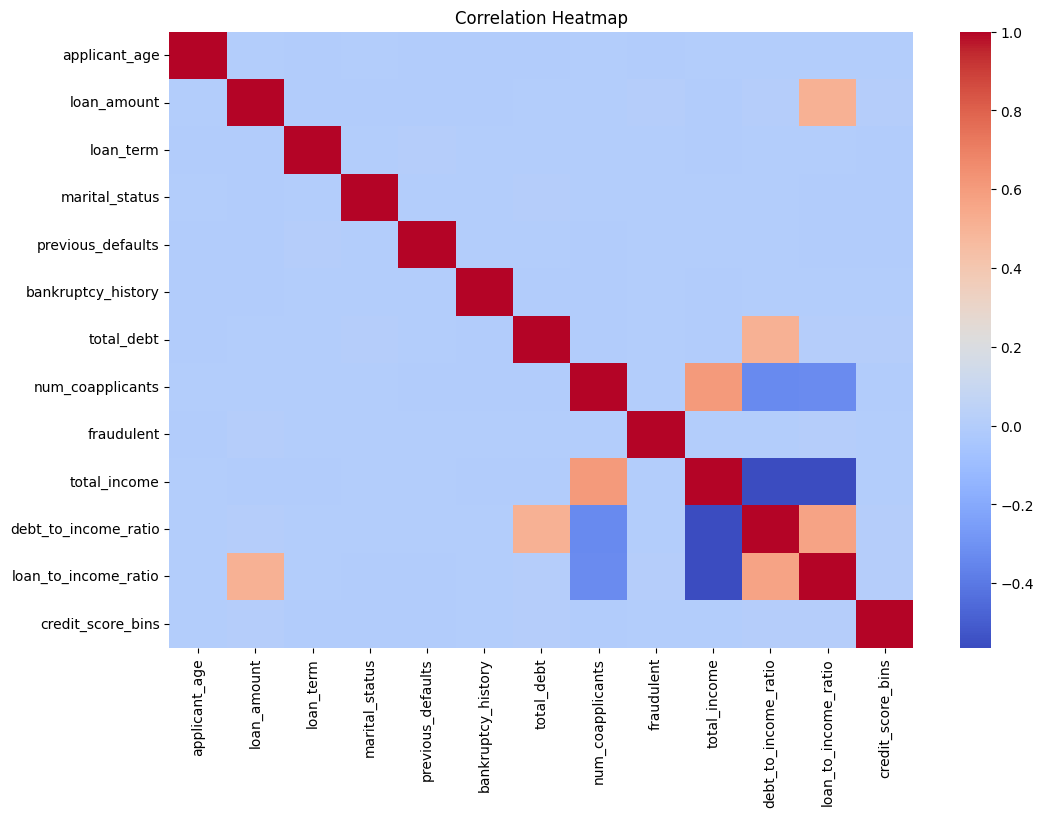

In [211]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.iloc[:,1:].corr(numeric_only = True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

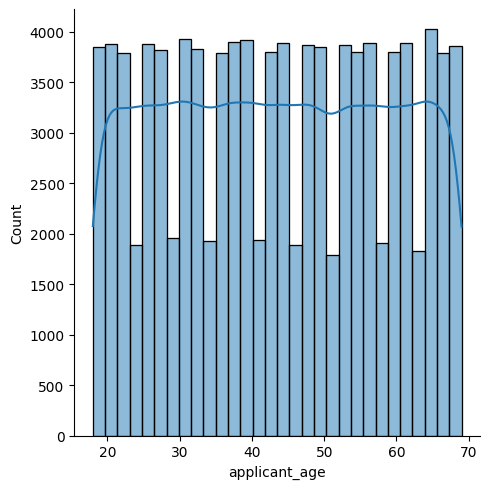

In [212]:
sns.displot(df['applicant_age'],
            kde=True,
            bins=30
            #, kind='kde'
           )

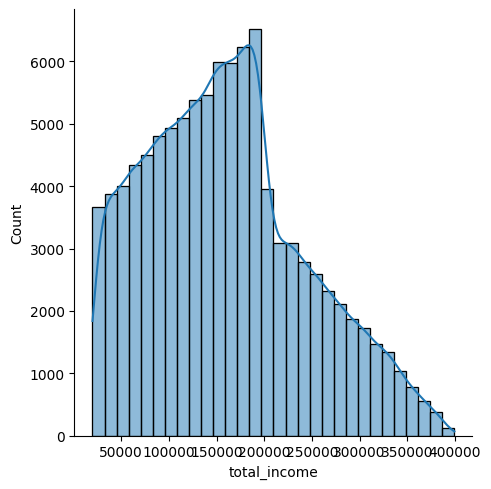

In [213]:
sns.displot(df['total_income'],
            kde=True,
            bins=30
            #, kind='kde'
           )

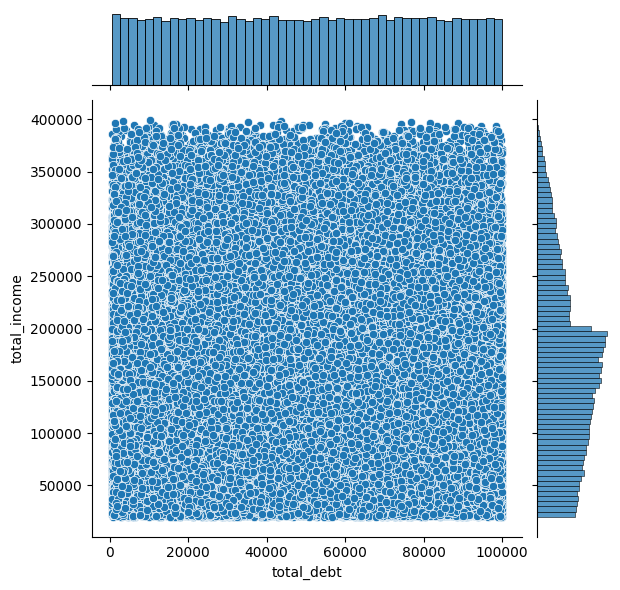

In [214]:
sns.jointplot(x='total_debt',y='total_income',data=df)

In [215]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['applicant_age','loan_amount','loan_term','total_debt','total_income']] = scaler.fit_transform(df[['applicant_age','loan_amount','loan_term','total_debt','total_income']])
df.head()

,loan_id,applicant_age,loan_amount,loan_term,marital_status,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,fraudulent,total_income,debt_to_income_ratio,loan_to_income_ratio,credit_score_bins
0,1,0.367027,0.290537,0.203262,2,4,0,-0.246854,1,0,2.639511,0.113531,0.767554,3
1,2,-0.965259,-0.437059,-0.060910,0,4,0,-0.491828,1,0,-0.817245,0.391277,2.027985,4
2,3,-0.565573,0.836385,-0.256593,2,0,0,-0.846864,1,0,0.346897,0.136766,1.956982,3
3,4,-1.298331,-0.747452,0.144557,1,0,1,-1.310608,1,0,0.392601,0.064880,0.738120,4
4,5,-0.165888,-0.004235,-0.980621,2,3,1,-1.427482,0,0,-0.520281,0.078270,2.131442,3


In [216]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraudulent', 'loan_id'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)
X_train.head()

,applicant_age,loan_amount,loan_term,marital_status,previous_defaults,bankruptcy_history,total_debt,num_coapplicants,total_income,debt_to_income_ratio,loan_to_income_ratio,credit_score_bins
64304,1.366241,0.444035,-0.217456,0,0,0,-0.485155,0,-1.265321,0.660456,5.711231,3
78145,-0.832031,0.579304,-0.843643,2,2,0,-1.709642,0,0.276328,0.005628,1.818018,3
19755,-0.765416,1.734207,0.985995,2,4,0,0.776795,0,-0.291784,0.533984,3.671554,4
78591,-1.698016,-0.941418,1.573044,2,4,0,0.617835,1,1.390294,0.246495,0.414959,1
42070,0.233798,-0.769328,1.122973,1,2,1,-1.465954,1,1.114615,0.031798,0.550373,1


In [217]:
X_train.shape

(70000, 12)

Text(0.5, 1.0, 'Correlation Heatmap')

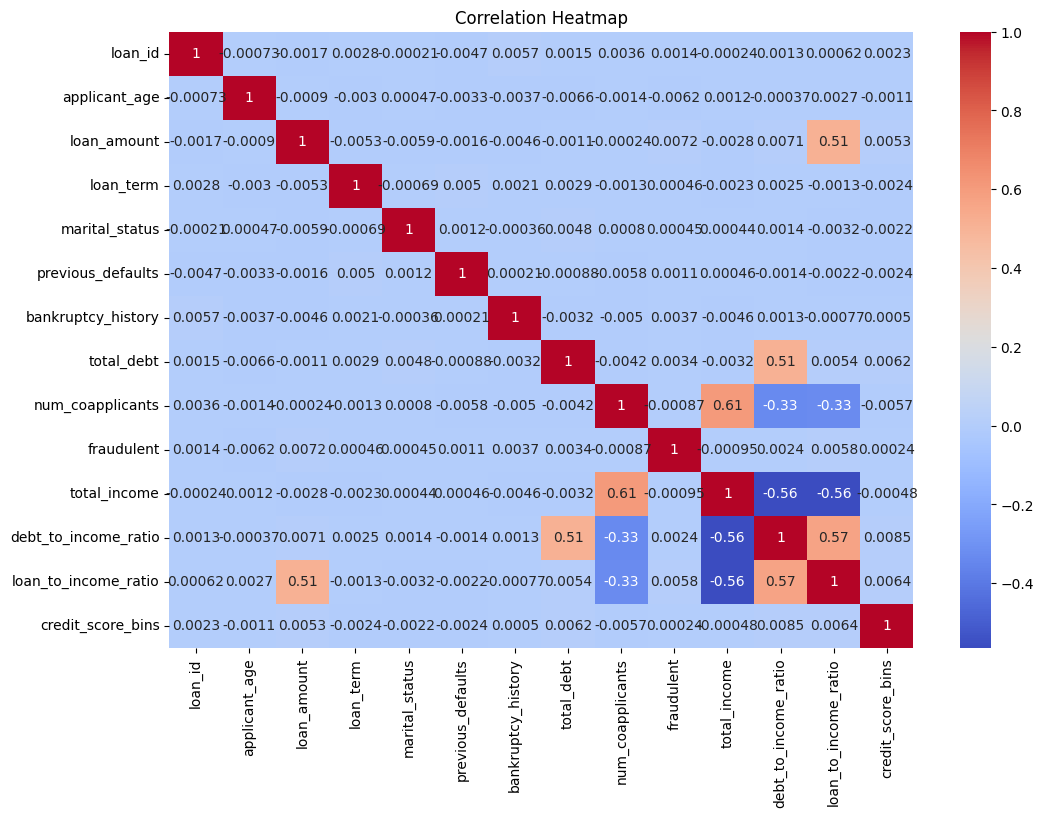

In [218]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [219]:
#Evaluating the model

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_test, y_pred, model):
  """Creating a function to calculate the precision, recall and f1 scores of the models.
  Return:
  dict: dictionary containing precision, recall, f1 score and confusion matrix
  """
  precision = precision_score(y_test, y_pred, zero_division=1)
  recall = recall_score(y_test, y_pred, zero_division=1)
  f1 = f1_score(y_test, y_pred, zero_division=1)

  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

  evaluation_results = {
      'Precision': precision,
      'Recall' : recall,
      'F1 score': f1,
      'Confusion Matrix': cm
  }

  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 score: {f1:.4f}")
  print(f"Confusion Matrix: ")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
  disp.plot()
  plt.show()
  print(cm)

  return evaluation_results

Precision: 0.0464
Recall: 0.4625
F1 score: 0.0844
Confusion Matrix: 


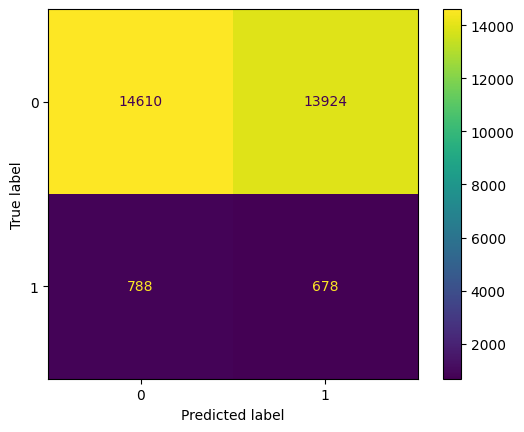

[[14610 13924]
 [  788   678]]
{0: 15398, 1: 14602}


In [220]:
# Model 1 of 5
# Implementing Logistic Regression

from sklearn.linear_model import LogisticRegression


#initiating and training the model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

#making predictions
y_pred_lr = lr.predict(X_test)

results_lr = evaluate_model(y_test, y_pred_lr, lr)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_lr, return_counts=True)
print(dict(zip(unique, counts)))

## Logistic regression
Precision (0.0464): This indicates that only about 4.64% of the positive predictions (fraudulent loans) were actually correct. This is quite low, suggesting that the model is producing a lot of false positives (i.e., predicting a loan as fraudulent when it is not).

Recall (0.4625): This value indicates that the model correctly identifies approximately 46.22% of actual fraudulent loans. While this is a strong recall, it also indicates that the model is missing more than half of the actual fraudulent applications which means that more than half of the fraudulent applications are being labeled as non-fraudulent which is dangerous.

F1 Score (0.0844): The F1 score is the harmonic mean of precision and recall. A low F1 score suggests a poor balance between precision and recall. Given that the precision is very low, it significantly affects the F1 score.

TN: 12510, FP: 13924, FN: 788, TP: 678

FP indicates that the model is classifying non-fraudulent loan applications as fraudulent. TN value is good which indicates that it is able to classify non-fraudulent applications as non-fraudulent but FP is really high which makes this model and dataset not reliable for predicting fraudulent applications.

Precision: 0.0000
Recall: 0.0000
F1 score: 0.0000
Confusion Matrix: 


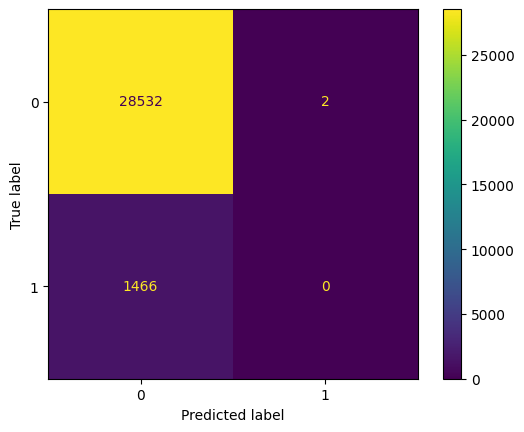

[[28532     2]
 [ 1466     0]]
{0: 29998, 1: 2}


In [221]:
# Model 2 of 5
# Implementing XGBoost model

from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

results_xgb = evaluate_model(y_test, y_pred_xgb,xgb)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_xgb, return_counts=True)
print(dict(zip(unique, counts)))

In [222]:
# The dataset is heavily imbalanced and hence using SMOTE which is Synthetic Minority Oversampling Technique which will synthetically increase the number of cases in the dataset in a balanced way.

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

Precision: 0.0433
Recall: 0.0382
F1 score: 0.0406
Confusion Matrix: 


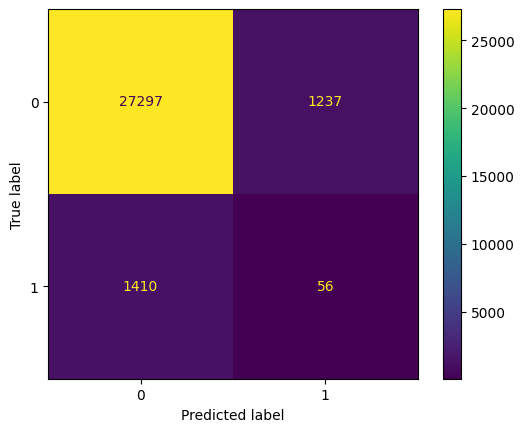

[[27297  1237]
 [ 1410    56]]
{0: 28707, 1: 1293}


In [223]:
# Model 2a.


xgb1 = XGBClassifier()
xgb1.fit(X_resampled, y_resampled)
y_pred_xgb_sm = xgb1.predict(X_test)

results_xgb_sm = evaluate_model(y_test, y_pred_xgb_sm,xgb1)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_xgb_sm, return_counts=True)
print(dict(zip(unique, counts)))

## XGBoost Model analysis

Precision (0.0433):
This indicates that only about 4.33% of the positive predictions (fraudulent loans) were actually correct. This is quite low, suggesting that the model is producing a lot of false positives (i.e., predicting a loan as fraudulent when it is not).

Recall (0.0382):
This value indicates that the model correctly identifies approximately 3.82% of actual fraudulent loans. While this is a very bad recall, it also indicates that the model is missing most of the actual fraudulent applications which means that almost all of the fraudulent applications are being labeled as non-fraudulent which is very dangerous.

F1 Score (0.0406):
The F1 score is the harmonic mean of precision and recall. A low F1 score suggests a poor balance between precision and recall. Given that the precision is very low, it significantly affects the F1 score.

TN: 27297, FP: 1237, FN: 1410, TP: 56

TN value is good which indicates that it is able to classify non-fraudulent applications as non-fraudulent but FP is really low which makes this model and dataset not reliable for predicting fraudulent applications.

Precision: 1.0000
Recall: 0.0000
F1 score: 0.0000
Confusion Matrix: 


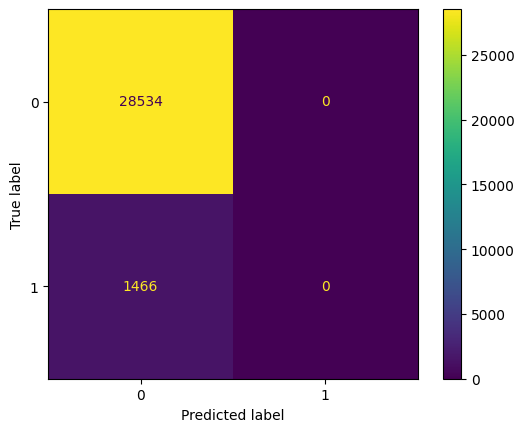

[[28534     0]
 [ 1466     0]]
{0: 30000}


In [224]:
# Model 3 of 5
# Implementing LGBM Classification model.

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

evaluate_model(y_test, y_pred_lgbm, lgbm)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_lgbm, return_counts=True)
print(dict(zip(unique, counts)))

Precision: 0.0487
Recall: 0.2804
F1 score: 0.0829
Confusion Matrix: 


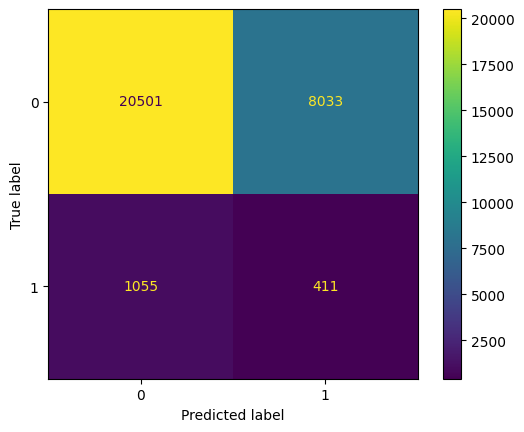

[[20501  8033]
 [ 1055   411]]
{0: 21556, 1: 8444}


In [225]:
# Model 3a: Using SMOTE in lgbm.

#sm = SMOTE(random_state=101)
#X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

lgbm1 = LGBMClassifier(objective= 'binary',metric = 'binary_logloss', learning_rate=0.01, verbose=-1)
lgbm1.fit(X_resampled, y_resampled)
y_pred_lgbm_sm = lgbm1.predict(X_test)

evaluate_model(y_test, y_pred_lgbm_sm, lgbm1)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_lgbm_sm, return_counts=True)
print(dict(zip(unique, counts)))

#LightGBM Model analysis

Precision: 4.87% indicates that the model is predicting only 4.87% of the actual fraudulent cases as fraudulent.

Recall: 28.04% indicates that the model is missing many fraudulent cases.

F1 score: 0.0829 indicates that the model is not performing well overall as it fails to capture both true positive and minimize false positives.

Overall model is not doing good on this data.

Precision: 0.0476
Recall: 0.4905
F1 score: 0.0868
Confusion Matrix: 


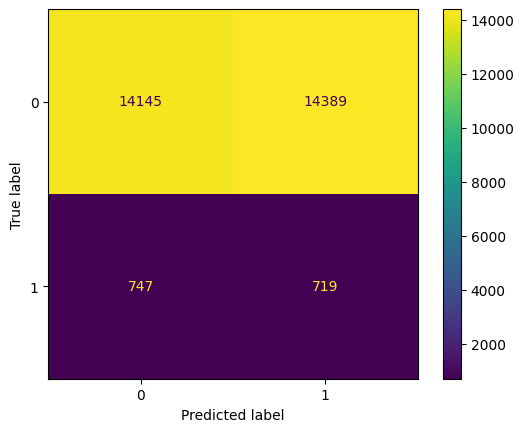

[[14145 14389]
 [  747   719]]
{0: 14892, 1: 15108}


In [226]:
# Model 4 of 5
# Implementing SVM

from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', class_weight='balanced', random_state = 101, verbose=False)

svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
evaluate_model(y_test, y_pred_svm, svm_classifier)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_svm, return_counts=True)
print(dict(zip(unique, counts)))

# Support Vector Machine model analysis

Precision: 4.76% of the instances predicted as fraudulent are correct.

Recall: 49.05% of the actual fraudulent cases are being correctly identified as fraudulent.

F1 score: is very low indicating that the model's overall performance is bad.

Verdict: This model is not suitable to predict based on this data.

recall of almost 50% tells us that the model is better at capturing fraudulent cases compared to earlier models. however model incorrectly labels non-fraudulent 14389 cases as fraudulent which is better than labelling fraudulent cases as non-fraudulent. This is safer for the business but detrimental to its income.
Better tuning the model and getting a better dataset would yield much better results using this model.

Precision: 1.0000
Recall: 0.0000
F1 score: 0.0000
Confusion Matrix: 


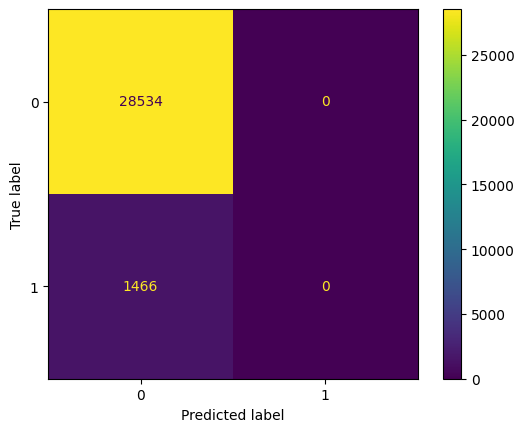

[[28534     0]
 [ 1466     0]]
{0: 30000}


In [227]:
# Model 5 of 5
# Implementing Naive Bayes model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
evaluate_model(y_test, y_pred_gnb, gnb)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_gnb, return_counts=True)
print(dict(zip(unique, counts)))

Precision: 0.0481
Recall: 0.8622
F1 score: 0.0912
Confusion Matrix: 


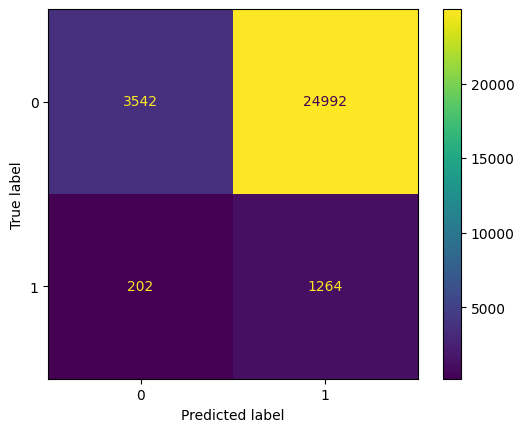

[[ 3542 24992]
 [  202  1264]]
{0: 3744, 1: 26256}


In [228]:
gnb1 = GaussianNB()
gnb1.fit(X_resampled, y_resampled)
y_pred_gnb_sm = gnb1.predict(X_test)
evaluate_model(y_test, y_pred_gnb_sm,gnb1)

#Checking the distribution of the classes in the predicted data 0 for non-fraudulent and 1 for fraudulent
unique, counts = np.unique(y_pred_gnb_sm, return_counts=True)
print(dict(zip(unique, counts)))

# Naive Bayes model performance analysis

Precision: 4.81% is similar to the other models we have used and is therefore not a good model to predict fraudulent cases. Only 4% of the predicted fraudulent cases are actually fraudulent.

Recall: 86.22% indicates that the model is very effective at identifying actual fraudulent cases.

F1 score: is slightly better than the other models we have experimented with.

From the confusion matrix we can see that it incorrectly classified 24992 applications as fraudulent when they were actually non-fraudulent. But out of the total actual fraudulent cases of 1464 it was able to predict 1264 cases as fraudulent.

# Final Insights

1. Objective: I was asked to create a model which could correctly identify a fraudulent loan application.

2. Challenges:
    *   One of the biggest challenges I faced was finding a real case dataset which prompted me to create a synthetic dataset.
    *    The dataset could have been made better by introducing relationships between features such as credit score and bankruptcy history (credit score should be lower as the number of bankruptcy history goes up).
    *   Normally distributed columns such as applicant_age, applicant_income etc wouldve introduced more correlation between the data.
    *   Developing relationships between the features and the target feature 'fraudulent' would introduce more causality in the dataset and thus improve the model performance.

3. Model Performance: I selected Logistic regression, XGBoost Regressor, Light GBM, SVM and Naive Bayes model on this dataset. All of the models gave very poor Precision i.e. model predicted fraudulent cases were actually fraudulent. Few models such as SVM and Naive Bayes models provided better Recall as compared to the other models indicating that they were really good at identifying actual fraudulent cases.

4. Best model selection: Based on the results which I have seen on this dataset I believe a better dataset would provide very good results on SVM model as it was able to identify fraufdulent cases as fraudulent which is more important for the safety of the business. However in the long run incorrectly identifying a non-fraudulent application as a fraudulent loan application will result in lower profits.

5. Improvements:
    *   Apart from a better dataset, techniques such as hyper-parameter tuning, data balancing technique, ensemble approaches could prove useful in getting better results in the classification models.
